# 02 - Run SQL Queries

In [2]:
#Import libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Re-establish the connection
conn = sqlite3.connect('../data/ecommerce.db')

In [4]:
#Check the list of tables in this database
pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table'", conn)

,name
0,users
1,products
2,orders
3,payments


In [6]:
#To write SQL queries directly in Python besides SELECT, do the below
cursor = conn.cursor()

In [14]:
#Preview tables (like .head())
pd.read_sql("SELECT * FROM users LIMIT 5;", conn)

,user_id,signup_date,country
0,1,2025-02-25,US
1,2,2025-03-26,US
2,3,2024-05-25,CA
3,4,2025-03-15,UK
4,5,2024-04-20,UK


In [85]:
pd.read_sql("SELECT * FROM products LIMIT 5;", conn)

,product_id,product_name,category,price
0,1,Unit,Books,115.49
1,2,Exactly,Books,285.46
2,3,Ready,Home,220.94
3,4,Most,Home,181.60
4,5,Turn,Beauty,51.03


In [16]:
pd.read_sql("SELECT * FROM orders LIMIT 5;", conn)

,order_id,user_id,product_id,quantity,order_date
0,1,923,46,3,2025-04-27
1,2,295,7,3,2024-07-27
2,3,694,38,1,2025-01-03
3,4,560,38,1,2024-08-03
4,5,162,68,2,2025-06-16


In [17]:
pd.read_sql("SELECT * FROM payments LIMIT 5;", conn)

,payment_id,order_id,payment_type,amount
0,1,1,Paypal,601.32
1,2,2,Credit Card,66.39
2,3,3,Credit Card,33.81
3,4,4,Gift Card,33.81
4,5,5,Paypal,483.30


In [26]:
#Some descriptive statistcs
#Count of users by country in users table
pd.read_sql("""
SELECT country, count(*) as num_users
FROM users
GROUP BY country
ORDER BY num_users DESC;
""", conn)

,country,num_users
0,DE,207
1,UK,201
2,US,199
3,JP,198
4,CA,195


In [37]:
#10 most popular products based on order count
pd.read_sql("""
SELECT product_name, COUNT(*) as prod_ct
FROM orders o
JOIN products p
ON o.product_id = p.product_id
GROUP BY product_name
ORDER BY prod_ct DESC
LIMIT 10;
""", conn)

,product_name,prod_ct
0,Sport,216
1,Exactly,210
2,Less,199
3,Season,196
4,Voice,188
5,Party,188
6,Turn,171
7,Responsibility,125
8,Operation,124
9,Authority,124


In [39]:
#Total revenue from payment dataset
pd.read_sql("""
SELECT sum(amount) as total_revenue
FROM payments
""", conn)

,total_revenue
0,2875031.19


In [55]:
#Revenue by product category
pd.read_sql("""
SELECT p.category, sum(pay.amount) as revenue
FROM payments pay
LEFT JOIN orders o
on pay.order_id = o.order_id
LEFT JOIN products p
on o.product_id = p.product_id
GROUP BY p.category
ORDER BY revenue DESC;
""", conn)

,category,revenue
0,Beauty,774416.71
1,Home,638183.79
2,Books,633314.26
3,Clothing,426724.14
4,Electronics,402392.29


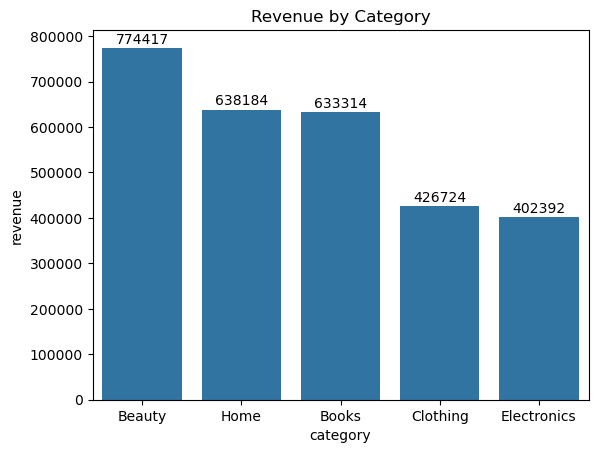

In [63]:
#Add visualization
df1 = pd.read_sql("""
SELECT p.category, sum(pay.amount) as revenue
FROM payments pay
LEFT JOIN orders o
on pay.order_id = o.order_id
LEFT JOIN products p
on o.product_id = p.product_id
GROUP BY p.category
ORDER BY revenue DESC;
""", conn)
ax = sns.barplot(data = df1, x = 'category', y = 'revenue')
ax.bar_label(ax.containers[0], fmt = '%.0f', label_type = 'edge', padding = 1)
plt.title('Revenue by Category')
plt.show()

Beauty had the largest revenue in this dataset

In [82]:
#Average revenue per order by product category
pd.read_sql("""
SELECT p.category, sum(pay.amount) as revenue, 
count(distinct o.order_id) as order_ct,
round((sum(pay.amount)/count(distinct o.order_id)), 2) as avg_rev_per_order
FROM payments pay
LEFT JOIN orders o
on pay.order_id = o.order_id
LEFT JOIN products p
on o.product_id = p.product_id
GROUP BY p.category
ORDER BY revenue DESC;
""", conn)

,category,revenue,order_ct,avg_rev_per_order
0,Beauty,774416.71,2744,282.22
1,Home,638183.79,1807,353.17
2,Books,633314.26,1936,327.13
3,Clothing,426724.14,1869,228.32
4,Electronics,402392.29,1644,244.76


Although Beauty category had the highest revenue, the highest average revenue per order was in the Home category.

Note that in this simulated dataset, each order can only be in one product category, but the quantity of the product purchased per order can be greater than 1.

In [69]:
#Time Trend
#Revenue by year-month
pd.read_sql("""
SELECT STRFTIME('%Y-%m', o.order_date) as month, sum(pay.amount) as revenue
FROM payments pay
LEFT JOIN orders o
ON pay.order_id = o.order_id
GROUP BY month
ORDER BY month;
""", conn)

,month,revenue
0,2024-06,82376.23
1,2024-07,244847.58
2,2024-08,257728.83
3,2024-09,228978.26
4,2024-10,229185.08
5,2024-11,248940.50
6,2024-12,268182.99
7,2025-01,244402.60
8,2025-02,217526.75
9,2025-03,239014.31


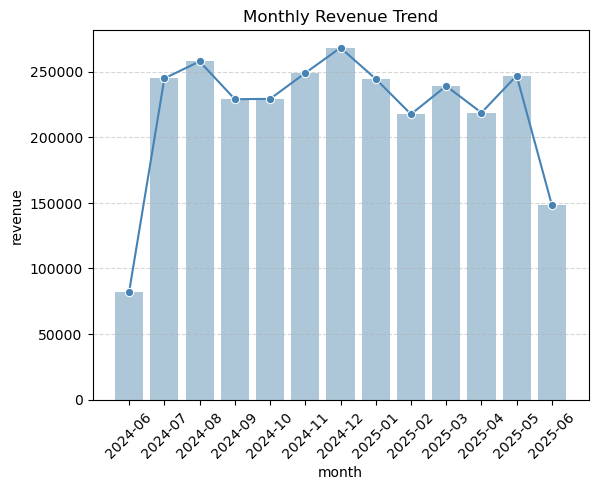

In [75]:
#Add visualization
df2 = pd.read_sql("""
SELECT STRFTIME('%Y-%m', o.order_date) as month, sum(pay.amount) as revenue
FROM payments pay
LEFT JOIN orders o
ON pay.order_id = o.order_id
GROUP BY month
ORDER BY month;
""", conn)
sns.barplot(data = df2, x = 'month', y = 'revenue', alpha = 0.4)
sns.lineplot(data = df2, x = 'month', y = 'revenue', marker = 'o', color = 'steelblue')
plt.title('Monthly Revenue Trend')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation = 45)
plt.show()

**Observations**

- June 2024 had the lowest revenue.

- Regardless of the year, June had the lowest revenue among all months.

- There appears to be no upward, downward, or cyclical trends over time other than June being the lowest months in both 2024 and 2025.

- Note: It is currently June 2025. This is a simulated data so it is not necessary to consider the fact that the month of June is not yet over. However, if this was real data, I need to consider that there is still another week of June left and that the revenue could still grow, which may change the observations above slightly. However, based on how the revenue is so far for this month, it seems that while the revenue for June 2025 may grow more (so the second observation may not hold), it will likely not surpass the other non-June months so the first and the third observations will hold. This assumes that the revenue will grow in a linear fashion in June (i.e., at a more or less constant rate).

**Future Work**

I could also explore other trends in this simulated dataset. For example:
- Top customers by the amount spent in this timeframe
- Average order size (amount spent per order / quantity of products ordered)
- Repeat vs one-time customers
- Conversion rate by country (number of users who placed at least one order by country / total number of users by country)

In [86]:
conn.close()